In [1]:
! pip install stingray

In [2]:
import numpy as np
from stingray.pulse.search import epoch_folding_search, z_n_search
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib as mpl
import astropy as ast
from stingray import EventList, Lightcurve

In [3]:
ev5 = EventList.read('4Ushort.fits', 'ogip')
ev7 = EventList.read('4Ularge.fits', 'ogip')
ev2 = EventList.read('4Umiddle.fits', 'ogip')
ev_temp = EventList.read('j0101.fits', 'ogip')
ev1 = ev_temp.apply_gtis([[4.186e8+57700, 4.186e8+60000]])
ev0 = EventList.read('3a0114.fits', 'ogip')
ev9 = EventList.read('j0243.fits', 'ogip')
ev6 = EventList.read('J0440.9.fits', 'ogip')
ev8 = EventList.read('v0332.fits', 'ogip')
ev3 = EventList.read('v0332short.fits', 'ogip')
ev7 = EventList.read('v0332middle.fits', 'ogip')
ev = EventList.read('1a 0535+26.fits', 'ogip')
ev8 = EventList.read('x persei.fits', 'ogip')
ev88 = EventList.read('x perseilong.fits', 'ogip')
fermitxt1 = np.loadtxt("4u1626_fermi.txt", skiprows=1)
fermitxt = np.loadtxt("a0535_fermi.txt", skiprows=1)
fermitxt2 = np.loadtxt("rxj0440_fermi.txt", skiprows=1)
fermitxt3 = np.loadtxt("swiftj0243_fermi.txt", skiprows=1)
fermitxt4 = np.loadtxt("v0332_fermi.txt", skiprows=1)

/opt/conda/lib/python3.12/site-packages/stingray/io.py:1077: UserWarning: No valid GTI extensions found. 
Error: list index out of range
GTIs will be set to the entire time series.
  warnings.warn(


In [4]:
ev.time[:10]
obs_length = ev.time.max() - ev.time.min()
print(obs_length)

37299.1828944087


[0.015625 0.046875 0.078125 0.109375 0.140625 0.171875 0.203125 0.234375
 0.265625 0.296875 0.328125 0.359375 0.390625 0.421875 0.453125 0.484375
 0.515625 0.546875 0.578125 0.609375 0.640625 0.671875 0.703125 0.734375
 0.765625 0.796875 0.828125 0.859375 0.890625 0.921875 0.953125 0.984375]
[3372. 3251. 3370. 3244. 3111. 3138. 3179. 3279. 3332. 3424. 3471. 3636.
 3633. 3764. 3936. 3890. 4117. 4052. 4130. 4244. 4195. 4038. 3940. 4061.
 3931. 3720. 3712. 3594. 3576. 3398. 3339. 3273.]


Text(0.5, 1.0, 'Epoch Folding of X Persei')

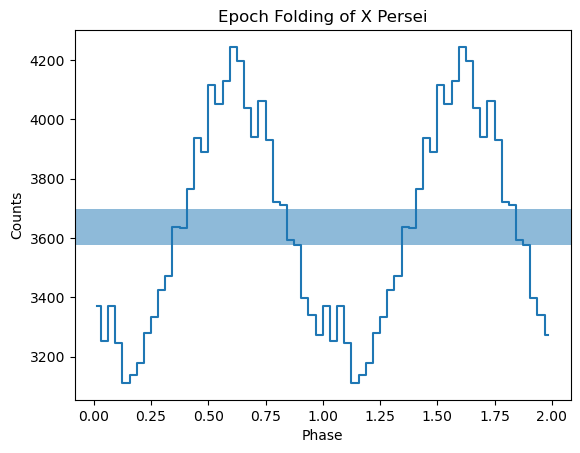

In [5]:
from stingray.pulse.pulsar import fold_events
from stingray.pulse.search import plot_profile
nbin = 32
period = 103.4
ph, profile, profile_err = fold_events(ev.time, 1/period, nbin=nbin)
_ = plot_profile(ph, profile)
print(ph)
print(profile)
plt.title("Epoch Folding of X Persei")

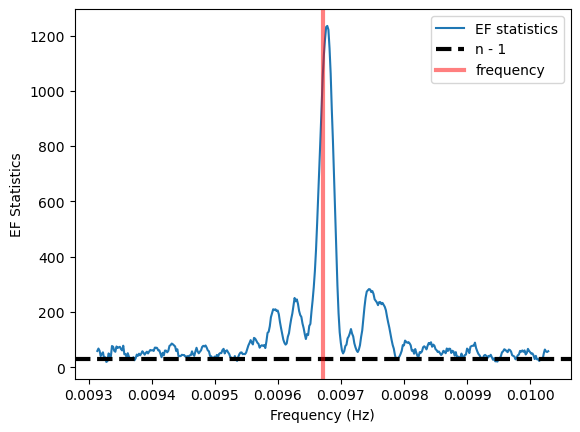

In [6]:
# We will search for pulsations over a range of frequencies around the known pulsation period.
df_min = 1/obs_length
oversampling=15
df = df_min / oversampling
frequencies = np.arange(1/period - 200 * df, 1/period + 200 * df, df)
#frequencies = np.arange(0, 0.1 , 0.00001)

freq, efstat = epoch_folding_search(ev.time, frequencies, nbin=nbin)

# ---- PLOTTING --------
plt.figure()
plt.plot(freq, efstat, label='EF statistics')
#plt.ylim(0,500)
plt.axhline(nbin - 1, ls='--', lw=3, color='k', label='n - 1')
plt.axvline(1/period, lw=3, alpha=0.5, color='r', label='frequency')
plt.xlabel('Frequency (Hz)')
plt.ylabel('EF Statistics')
_ = plt.legend()

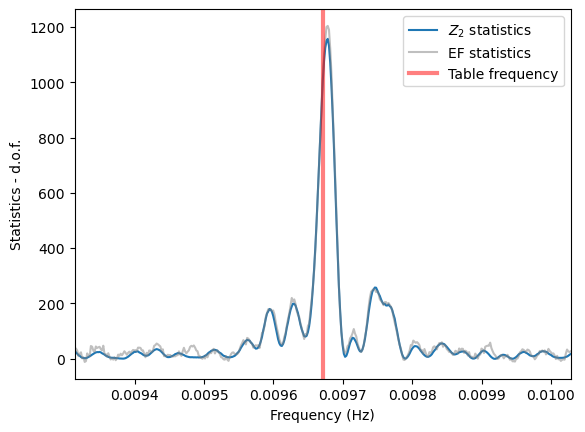

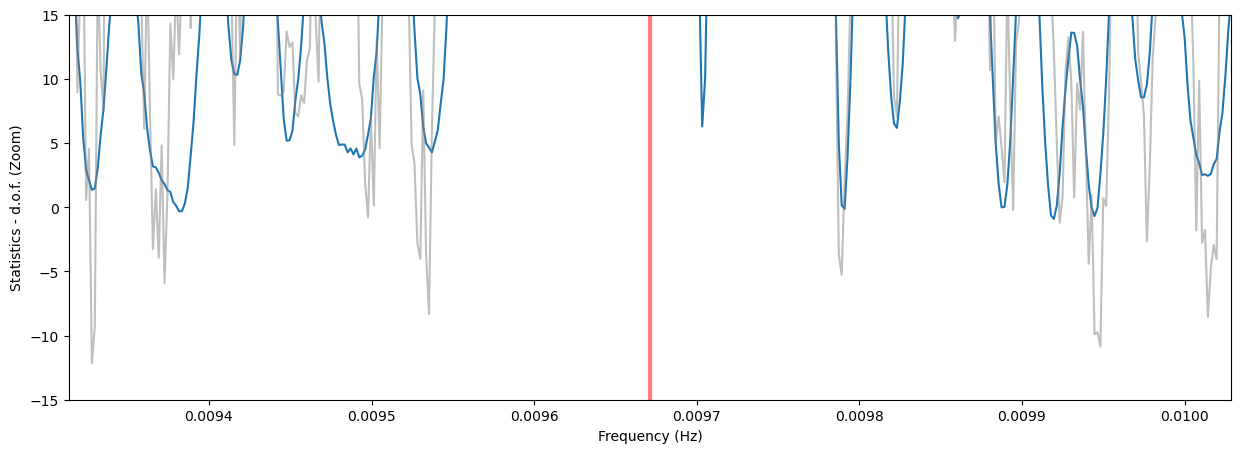

In [7]:
# We will search for pulsations over a range of frequencies around the known pulsation period.
nharm = 1
freq, zstat = z_n_search(ev.time, frequencies, nbin=nbin, nharm=nharm)
frequencies = np.arange(1/period - 200 * df, 1/period + 200 * df, df)
# ---- PLOTTING --------
plt.figure()
plt.plot(freq, (zstat - nharm), label='$Z_2$ statistics')
plt.plot(freq, efstat - nbin + 1, color='gray', label='EF statistics', alpha=0.5)

plt.axvline(1/period, color='r', lw=3, alpha=0.5, label='Table frequency')
plt.xlim([frequencies[0], frequencies[-1]])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Statistics - d.o.f.')
plt.legend()
plt.figure(figsize=(15, 5))
plt.plot(freq, (zstat - nharm), label='$Z_2$ statistics')
plt.plot(freq, efstat - nbin + 1, color='gray', label='EF statistics', alpha=0.5)

plt.axvline(1/period, color='r', lw=3, alpha=0.5, label='Correct frequency')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Statistics - d.o.f. (Zoom)')

plt.ylim([-15, 15])
_ = plt.xlim([frequencies[0], frequencies[-1]])

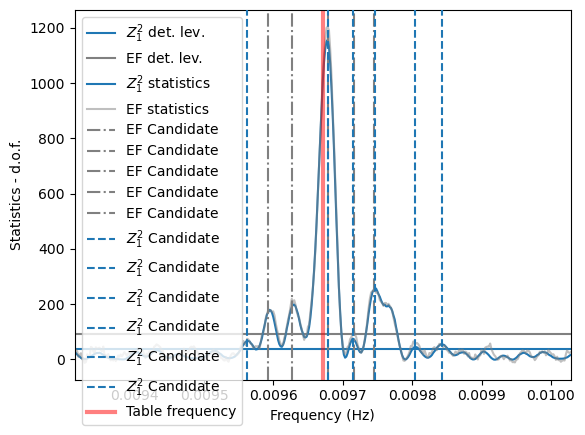

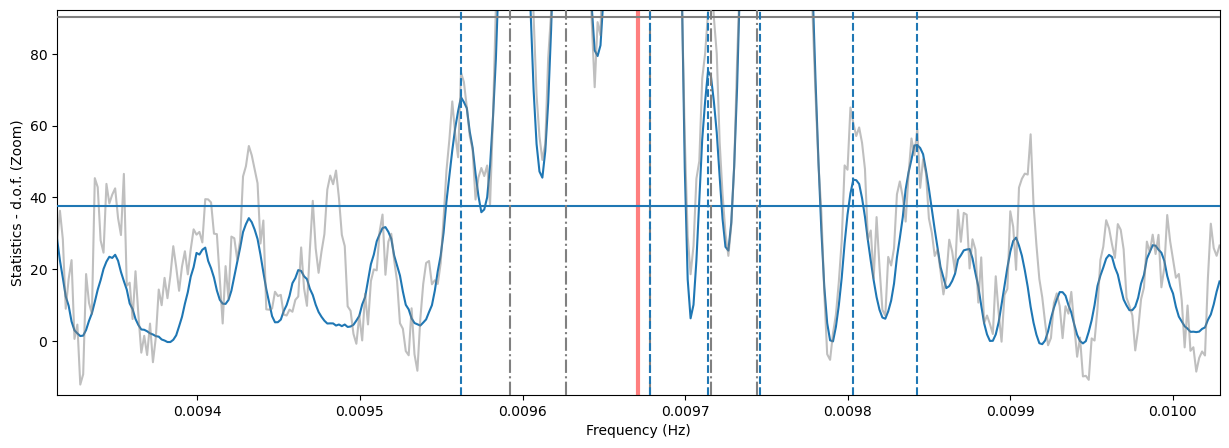

In [8]:
from stingray.pulse.search import search_best_peaks
from stingray.stats import fold_detection_level, z2_n_detection_level

ntrial = (frequencies[-1] - frequencies[0]) / df_min
#ntrial = 1000
z_detlev = 1.5*z2_n_detection_level(n=1, epsilon=0.001, ntrial=len(freq))
ef_detlev = 1.5*fold_detection_level(nbin, epsilon=0.001, ntrial=len(freq))

cand_freqs_ef, cand_stat_ef = search_best_peaks(freq, efstat, ef_detlev)
cand_freqs_z, cand_stat_z = search_best_peaks(freq, zstat, z_detlev)

# ---- PLOTTING --------
plt.figure()
plt.axhline(z_detlev - nharm, label='$Z^2_1$ det. lev.')
plt.axhline(ef_detlev - nbin + 1, label='EF det. lev.', color='gray')

plt.plot(freq, (zstat - nharm), label='$Z^2_1$ statistics')
plt.plot(freq, efstat - nbin + 1, color='gray', label='EF statistics', alpha=0.5)

for c in cand_freqs_ef:
    plt.axvline(c, ls='-.', label='EF Candidate', color='gray', zorder=10)
for c in cand_freqs_z:
    plt.axvline(c, ls='--', label='$Z^2_1$ Candidate', zorder=10)
    
plt.axvline(1/period, color='r', lw=3, alpha=0.5, label='Table frequency')
plt.xlim([frequencies[0], frequencies[-1]])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Statistics - d.o.f.')
plt.legend()

plt.figure(figsize=(15, 5))
plt.plot(freq, (zstat - nharm), label='$Z_2$ statistics')
plt.plot(freq, efstat - nbin + 1, color='gray', label='EF statistics', alpha=0.5)

plt.axvline(1/period, color='r', lw=3, alpha=0.5, label='Correct frequency')
plt.axhline(z_detlev - nharm, label='$Z^2_1$ det. lev.', zorder=10)
plt.axhline(ef_detlev - nbin + 1, label='EF det. lev.', color='gray', zorder=10)

for c in cand_freqs_ef:
    plt.axvline(c, ls='-.', label='EF Candidate', color='gray', zorder=10)
for c in cand_freqs_z:
    plt.axvline(c, ls='--', label='$Z^2_1$ Candidate', zorder=10)

plt.xlabel('Frequency (Hz)')
plt.ylabel('Statistics - d.o.f. (Zoom)')

plt.ylim([-15, ef_detlev - nbin + 3])
_ = plt.xlim([frequencies[0], frequencies[-1]])

In [9]:
print (ntrial)
print (cand_stat_ef)
print (cand_stat_z)

26.666666666665257
[1234.97318413  282.45302495  250.32513386  209.4758958   137.81893269]
[1158.17620488  258.10112289   76.24594641   68.92980386   55.57721635
   45.94896273]


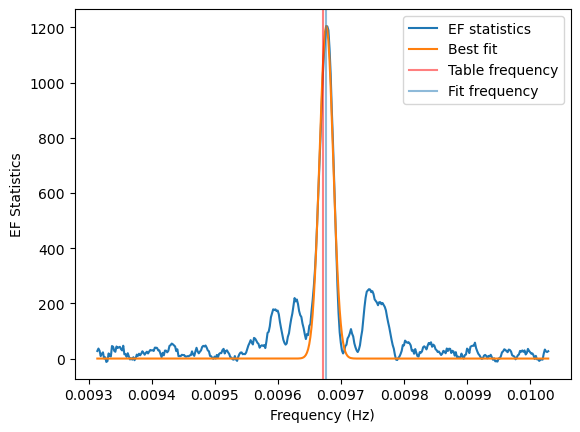

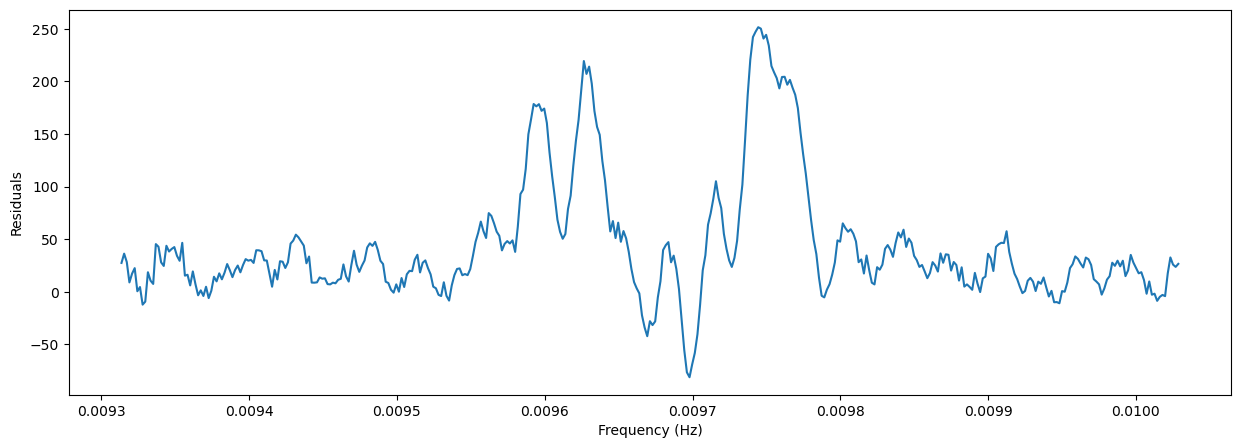

In [10]:
from stingray.pulse.modeling import fit_gaussian

fg=fit_gaussian(freq, efstat-(nbin-1),amplitude=max(efstat-(nbin-1)), 
                mean=cand_freqs_ef[0], stddev=1/(np.pi*obs_length))
# ---- PLOTTING --------
plt.figure()
plt.plot(freq, efstat-(nbin-1), label='EF statistics')
plt.plot(freq, fg(freq), label='Best fit')
plt.axvline(1/period, alpha=0.5, color='r', label='Table frequency')
plt.axvline(fg.mean[0], alpha=0.5, label='Fit frequency')
plt.xlabel('Frequency (Hz)')
plt.ylabel('EF Statistics')
plt.legend()

plt.figure(figsize=(15, 5))
plt.plot(freq, efstat-(nbin-1)-fg(freq))
plt.xlabel('Frequency (Hz)')
_ = plt.ylabel('Residuals')

In [11]:
stddev = 1 / (np.pi * obs_length)
print("Standard deviation:", stddev)
print("Period:", period)
error = stddev/(1/period**2)
print("Error:", error)
print("Period:", 1/fg.mean[0])

Standard deviation: 8.533964057199405e-06
Period: 103.4
Error: 0.09124138875539088
Period: 103.33992535366824


In [12]:
lc_new = ev.to_lc(dt=10)

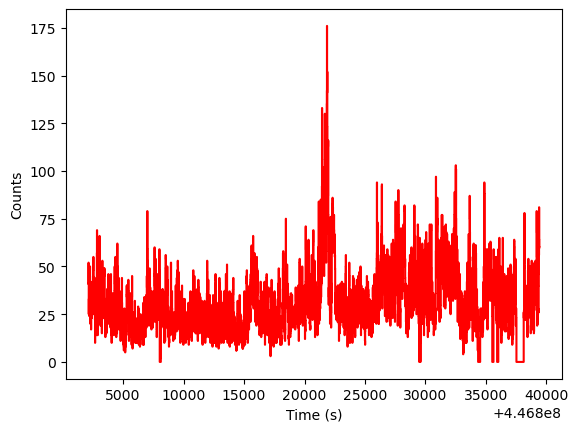

In [13]:
plt.plot(lc_new.time, lc_new.counts, 'r-', drawstyle='steps-mid')
plt.xlabel('Time (s)')
plt.ylabel('Counts')
plt.show()

In [14]:
mjd = lc_new.time / 86400.0 + 50814
first_value = mjd[0]
obs_length_mjd = obs_length/86400
midpoint = first_value + obs_length_mjd / 2
print(midpoint)

55985.53681020852


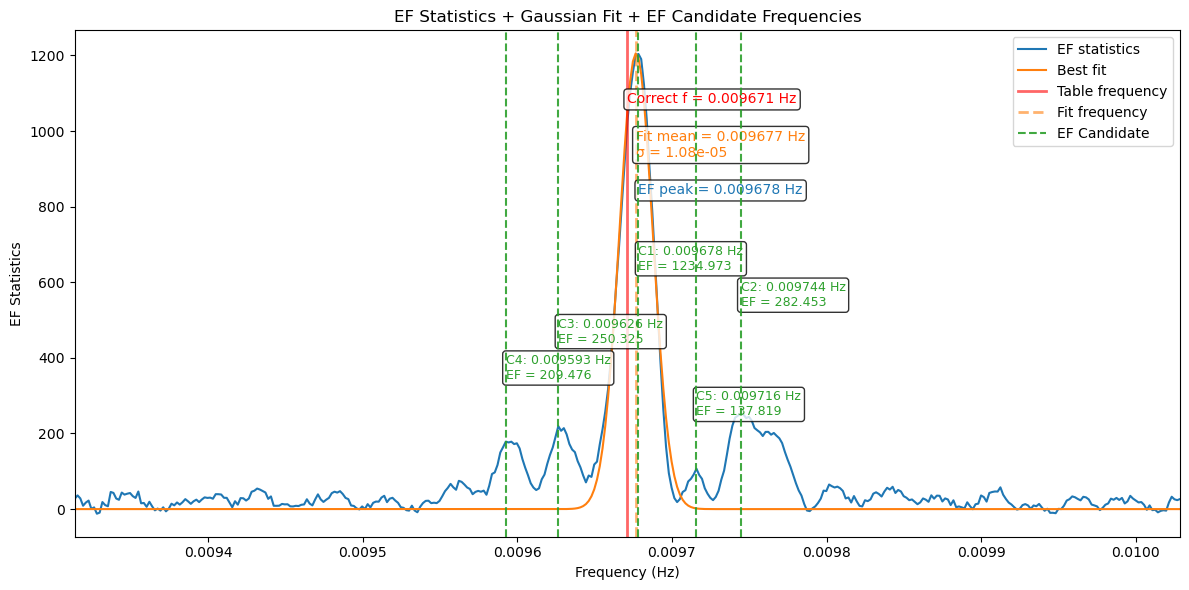

In [15]:
ef_curve = efstat - (nbin - 1)
plt.figure(figsize=(12, 6))
plt.plot(freq, efstat - (nbin - 1), label='EF statistics', color='C0')
plt.plot(freq, fg(freq), label='Best fit', color='C1')
plt.axvline(1/period, alpha=0.6, color='r', lw=2, label='Table frequency')
plt.axvline(fg.mean[0], alpha=0.6, color='C1', lw=2, linestyle='--', label='Fit frequency')
for i, c in enumerate(cand_freqs_ef, start=1):
    plt.axvline(c, ls='--', color='C2', alpha=0.9, zorder=10,
                label='EF Candidate' if i == 1 else "")
bbox_style = dict(boxstyle="round,pad=0.25", fc="white", alpha=0.8)

ymax = max(ef_curve)
plt.text(1/period, ymax * 0.90, f"Correct f = {1/period:.6f} Hz", color='r', fontsize=10, ha='left', va='center', bbox=bbox_style,)
plt.text(fg.mean[0], ymax * 0.80, f"Fit mean = {fg.mean[0]:.6f} Hz\nσ = {fg.stddev[0]:.2e}", color='C1', fontsize=10, ha='left', va='center', bbox=bbox_style,)
peak_idx = np.argmax(ef_curve)
plt.text(freq[peak_idx], ymax * 0.70, f"EF peak = {freq[peak_idx]:.6f} Hz", color='C0', fontsize=10, ha='left', va='center', bbox=bbox_style,)
for i, (c, s) in enumerate(zip(cand_freqs_ef, cand_stat_ef), start=1):
    plt.text(c, ymax * (0.55 - (i - 1) * 0.08), f"C{i}: {c:.6f} Hz\nEF = {s:.3f}", color='C2', fontsize=9, ha='left', va='center', bbox=bbox_style,)
plt.xlabel("Frequency (Hz)")
plt.ylabel("EF Statistics")
plt.xlim([frequencies[0], frequencies[-1]])
plt.legend()
plt.title("EF Statistics + Gaussian Fit + EF Candidate Frequencies")
plt.tight_layout()
plt.show()


In [16]:
barytime       = fermitxt[:,0]
frequency      = fermitxt[:,1]
frequency_err  = fermitxt[:,2]
amplitude      = fermitxt[:,3]
amplitude_err  = fermitxt[:,4]


In [17]:
idx = np.abs(barytime - midpoint).argmin()

fermi_time = barytime[idx]
fermi_freq = frequency[idx]
fermi_freq_err = frequency_err[idx]
fermi_amp = amplitude[idx]
fermi_amp_err = amplitude_err[idx]

print("Nearest time:", fermi_time)
print("Frequency:", fermi_freq, "+/-", fermi_freq_err)
print("Amplitude:", fermi_amp, "+/-", fermi_amp_err)

Nearest time: 55643.012952799356
Frequency: 0.00968583976034084 +/- 4.167816598510399e-07
Amplitude: 0.08886867761611938 +/- 0.015932835638523102


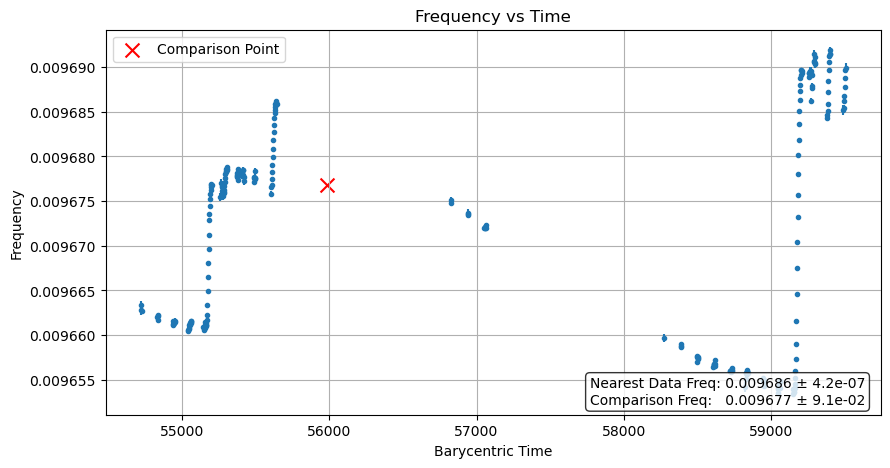

In [18]:
plt.figure(figsize=(10,5))
plt.errorbar(barytime, frequency, yerr=frequency_err, fmt='o', markersize=3)
plt.scatter(midpoint, fg.mean[0], color='red', s=100, marker='x', label='Comparison Point')
plt.xlabel("Barycentric Time")
plt.ylabel("Frequency")
plt.title("Frequency vs Time")
plt.legend()
ax = plt.gca()
textstr = (f"Nearest Data Freq: {fermi_freq:.6f} ± {fermi_freq_err:.1e}\n"
    f"Comparison Freq:   {fg.mean[0]:.6f} ± {error:.1e}")
ax.text(
    0.98, 0.02, textstr, 
    transform=ax.transAxes, 
    fontsize=10, 
    verticalalignment='bottom',
    horizontalalignment='right',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)
plt.grid(True)
plt.show()


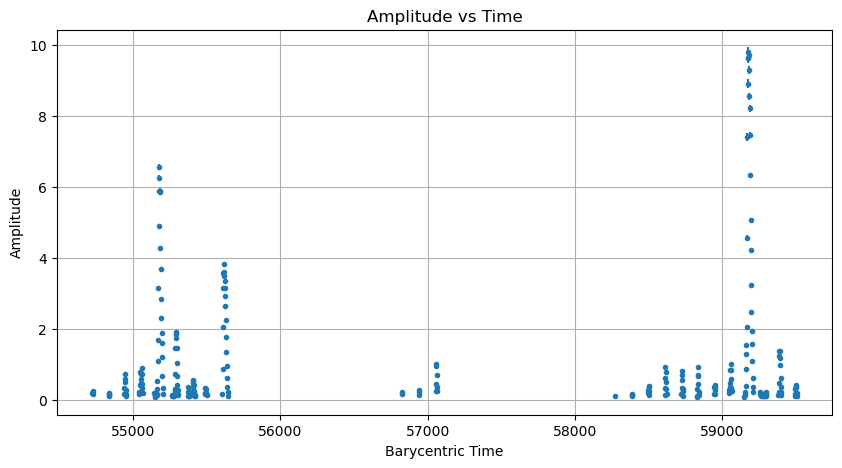

In [19]:
plt.figure(figsize=(10,5))
plt.errorbar(barytime, amplitude, yerr=amplitude_err, fmt='o', markersize=3)
plt.xlabel("Barycentric Time")
plt.ylabel("Amplitude")
plt.title("Amplitude vs Time")
plt.grid(True)
plt.show()
